<a href="https://colab.research.google.com/github/truongthuanr/self-project/blob/main/01_HousePriceAmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information

The dataset you in this notebook is from:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# Import data

Load the house price data to notebook

In [1]:
train_csv_url = "https://raw.githubusercontent.com/truongthuanr/self-learning-project/main/dataset/house_price_Ames/train.csv"
test_csv_url = "https://raw.githubusercontent.com/truongthuanr/self-learning-project/main/dataset/house_price_Ames/test.csv"

In [2]:
# import data
import pandas as pd 
train_df = pd.read_csv(train_csv_url)
test_df = pd.read_csv(test_csv_url)

# Explore Data

Import library

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



Check some info of the data

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Train target:**

"SalePrice" is the target to predict. Let's get more information for "Sale Price" 


In [6]:
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

See how the target distibution

In [7]:
sns.set_style('whitegrid')

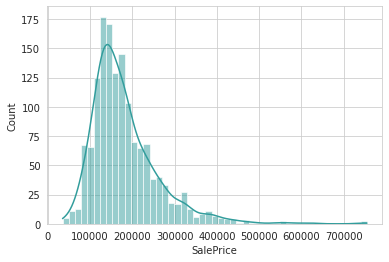

In [8]:
sns.histplot(train_df.SalePrice,kde=True,color="#329D9C")

**Some relation with other numerical variables:**

Discover the relation between lot area (in square feet) and sale price($).

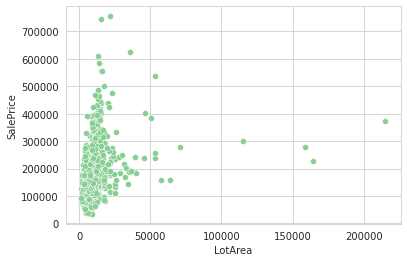

In [9]:
variable = "LotArea"
sns.scatterplot(x=train_df[variable],y=train_df["SalePrice"],color="#88CF94")

Can see that: 
- there is a large range of sale price for a specific value of lot area,
- `lot area > 20000` -> `sale price > 100000`
- there are some outliers

Discover relation between Garage Area (square feet) and sale price

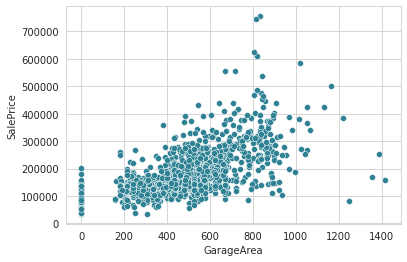

In [10]:
variable = "GarageArea"
sns.scatterplot(x=train_df[variable],y=train_df["SalePrice"],color="#2E8294")

In general, the larger garage -> high sale price.

Can see again some outliers

Discover relation between ground living area(square feet) and sale price

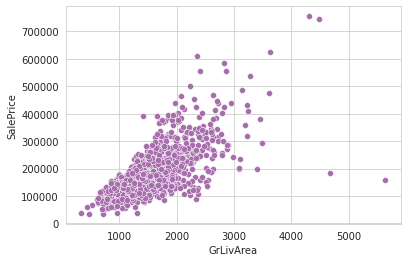

In [11]:
# Above grade (ground) living area square feet
variable = "GrLivArea"
sns.scatterplot(x=train_df[variable],y=train_df["SalePrice"],color="#A76EAD")

In general, the larger ground living area -> high sale price.

Discover relation between "Total square feet of basement area" (square feet) and sale price

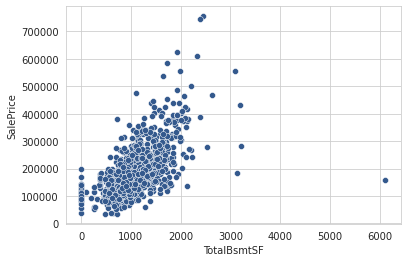

In [12]:
# TotalBsmtSF: Total square feet of basement area
variable = "TotalBsmtSF"
sns.scatterplot(x=train_df[variable],y=train_df["SalePrice"],color="#34598D")

There are some 0 value for basement area -> house doen not have basement, it have lower saleprice than the house which have larger basement

**Correlation matrix:**

Get the correlation matrix. Check the first 10 feature that have largest correlation with saleprice

In [13]:
corr_mat = train_df.corr()

In [61]:
corr_mat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [15]:
# Get 10 row with the largest correlation with SalePrice
k=10
cols = corr_mat.nlargest(k, "SalePrice").index
corr_mat_10 = train_df[cols].corr()
corr_mat_10

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000


Let's get the 10 largest correlation with sale price, and visualize it!!

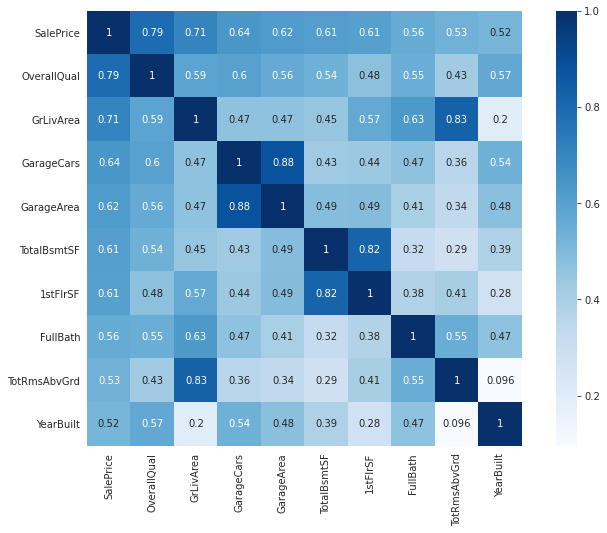

In [16]:
fig, axe = plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat_10,annot=True,square=True,cmap="Blues")

 `Overall Quality` is the most correlated feature with sale price, followed by the `ground living area`, `garage cars`(size of garage in car capicity), ... The "total area" is not in this list, it align with our reconization in the previous.

# Missing data

**Question?**
* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

I going to analize and handle the missing data in our dataset!!!

Let's count the missing data and compare with total number of data in each feature

In [17]:
# Missing data
missing = train_df.isna().sum().sort_values(ascending=False) # Get number of missing data
percent = missing/train_df.isna().count()
# Create a dataframe 
missing_data = pd.concat([missing,percent],keys=["Total","Percent"],axis=1)

In [18]:
missing_data.T

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical,Utilities,YearRemodAdd,MSSubClass,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,RoofStyle,YearBuilt,LotConfig,OverallCond,OverallQual,HouseStyle,BldgType,Condition2,BsmtFinSF1,MSZoning,LotArea,Street,...,Neighborhood,LotShape,LandContour,LandSlope,SalePrice,HeatingQC,BsmtFinSF2,EnclosedPorch,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,BsmtUnfSF,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,Functional,TotRmsAbvGrd,KitchenQual,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,BsmtFullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,TotalBsmtSF,Id
Total,1453.000000,1406.000000,1369.000000,1179.000000,690.000000,259.000000,81.000000,81.000000,81.000000,81.000000,81.000000,38.000000,38.000000,37.000000,37.000000,37.000000,8.000000,8.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.995205,0.963014,0.937671,0.807534,0.472603,0.177397,0.055479,0.055479,0.055479,0.055479,0.055479,0.026027,0.026027,0.025342,0.025342,0.025342,0.005479,0.005479,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Adding correlation to see how the related..

In [19]:
missing_data = pd.concat([missing,percent,corr_mat["SalePrice"]],keys=["Total","Percent","Correlation"],axis=1)

In [20]:
missing_data.T

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical,Utilities,YearRemodAdd,MSSubClass,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,RoofStyle,YearBuilt,LotConfig,OverallCond,OverallQual,HouseStyle,BldgType,Condition2,BsmtFinSF1,MSZoning,LotArea,Street,...,Neighborhood,LotShape,LandContour,LandSlope,SalePrice,HeatingQC,BsmtFinSF2,EnclosedPorch,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,BsmtUnfSF,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,Functional,TotRmsAbvGrd,KitchenQual,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,BsmtFullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,TotalBsmtSF,Id
Total,1453.000000,1406.000000,1369.000000,1179.000000,690.000000,259.000000,81.000000,81.000000,81.000000,81.000000,81.000000,38.000000,38.000000,37.000000,37.000000,37.000000,8.000000,8.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
Percent,0.995205,0.963014,0.937671,0.807534,0.472603,0.177397,0.055479,0.055479,0.055479,0.055479,0.055479,0.026027,0.026027,0.025342,0.025342,0.025342,0.005479,0.005479,0.000685,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
Correlation,NaN,NaN,NaN,NaN,NaN,0.351799,NaN,NaN,0.486362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.477493,NaN,NaN,NaN,0.507101,-0.084284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.522897,NaN,-0.077856,0.790982,NaN,NaN,NaN,0.38642,NaN,0.263843,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,-0.011378,-0.128578,0.466929,0.640409,0.623431,NaN,0.324413,0.315856,0.044584,0.214479,0.111447,0.092404,-0.02119,0.046432,-0.028923,NaN,NaN,0.533723,NaN,-0.135907,0.168213,0.284108,0.560664,-0.016844,0.227122,0.708624,-0.025606,0.319334,0.605852,NaN,NaN,NaN,0.613581,-0.021917


* We will remove the variable have large number of missing data `PoolQC` `MiscFeature`, `Alley`, `Fence`, `FireplaceQu`, `LotFrontage`. These feature seem to be not very importance.
* The `GarageCond`, `GarageType`, `GarageYrBlt`, `GarageQual` are removed, because the garage's information is show in `GarageCars` variable, seem to be its contain enough information. and the same for `Bsmt-X` feature.
* `MasVnrArea` and `MasVnrType` is have strong correlation with `YearBuilt` and `OverallQual` which is already include in our data.
* only 1 missing value in `Electrical`, so we just drop this item(row).

**-> We drop the these feature and the item with missing value in `Electrical` feature!!**

In [21]:
# drop the cols with large amount of missing data (also not importance!)
train_df = train_df.drop((missing_data[missing_data["Total"]>1]).index,axis = 1 )


In [22]:
train_df["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [23]:
# Electrical variable have most value as "SBrkr" -> we set the missing data 
train_df.fillna(train_df["Electrical"].mode()[0], inplace=True)

# Outliars

In [25]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
SalePrice_scaled = StandardScaler().fit_transform(train_df["SalePrice"].to_numpy()[:,np.newaxis])

# Get the low values
low_range = SalePrice_scaled[SalePrice_scaled[:,0].argsort()][:10]

# Get the high values
high_range = SalePrice_scaled[SalePrice_scaled[:,0].argsort()][-10:]

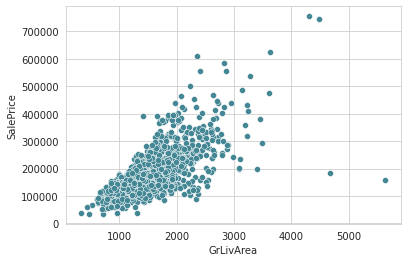

In [26]:
sns.scatterplot(x=train_df["GrLivArea"], y=train_df['SalePrice'],color="#438694")

As we can see 2 point in the bottom right of the figure, these values are huge outliers, need to remove.

In [27]:
remove_item = train_df[(train_df["GrLivArea"]>4000) & (train_df["SalePrice"]<300000)]
train_df = train_df.drop(remove_item.index)

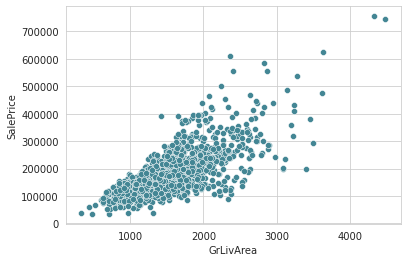

In [28]:
sns.scatterplot(x=train_df["GrLivArea"], y=train_df['SalePrice'],color="#438694")

# Target Variable

In [29]:
from scipy.stats import norm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


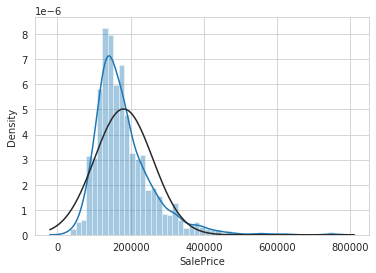

In [30]:
sns.distplot(train_df.SalePrice, fit=norm)

Using log transform

In [31]:
SalePrice_transformed = train_df["SalePrice"] = np.log1p(train_df['SalePrice'])

In [32]:
train_df['SalePrice'] = SalePrice_transformed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


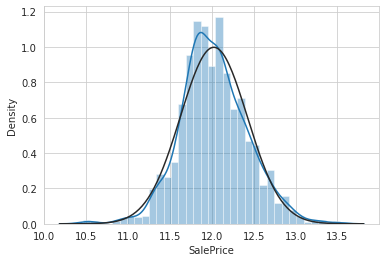

In [33]:
sns.distplot(SalePrice_transformed, fit=norm)

# Categorical Variables

In this section, we handle the category variable, to put it in our model.

using `LabelEncoder` to convert the category variable

In [34]:
from sklearn.preprocessing import LabelEncoder

Get the category columns

In [35]:
category_columns = (set(train_df.columns) - set(train_df._get_numeric_data().columns))

Convert category data to number

In [36]:
for c in category_columns:
  lbl = LabelEncoder()
  lbl.fit(list(train_df[c].values))
  train_df[c] = lbl.transform(list(train_df[c].values))

In [37]:
train_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,2,4,2,706,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,12.247699
1,2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,3,4,1,978,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,12.109016
2,3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,2,4,2,486,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,12.317171
3,4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,3,4,0,216,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,11.849405
4,5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,2,4,2,655,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,12.429220


# Train Data - Test Data 

Lets prepair the train/test data.

In [38]:
y = train_df["SalePrice"]

In [39]:
X = train_df.drop('SalePrice',axis=1)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model

Create a fuction to calculate the root mean square error for evaluate out model!

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
# root mean square error
def rmse(y, y_pred):
  return np.sqrt(mean_squared_error(y, y_pred))

## Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression

Create Linear Regression model, and fit with out train data

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Make the prediction with test data

In [46]:
predictions = lr.predict(X_test)

### Predictions and actual SalePrice on Testing data

Let's see the result by create the chart compare the prediction and actual Sale Price in our test set

Text(0.5, 0, 'Predictions')

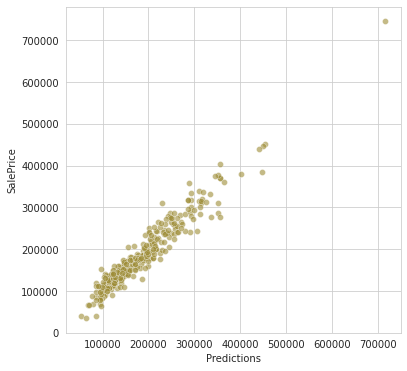

In [47]:
plt.subplots(figsize=(6,6))
fig = sns.scatterplot(x=np.expm1(predictions), y=np.expm1(y_test),color="#9D8C36", alpha=0.6)
fig.set_xlabel("Predictions")

and the error

In [48]:
rmse(predictions, y_test)

0.12483105646356739

## Lasso Regression Model

We do the same for Lasso Regression Model, and make the comparision!

In [49]:
from sklearn.linear_model import Lasso

In [50]:
lasso = Lasso(alpha=0.0005)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
predictions_lasso = lasso.predict(X_test)

In [52]:
rmse(predictions_lasso, y_test)

0.12288828354166867

Text(0.5, 0, 'Predictions of Lasso Model')

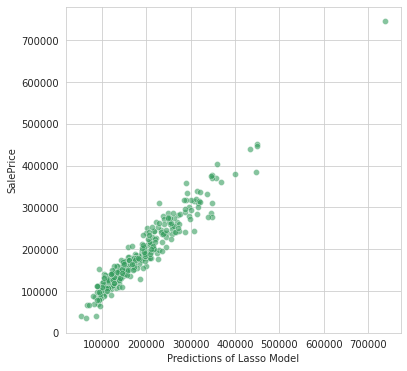

In [53]:
plt.subplots(figsize=(6,6))
fig = sns.scatterplot(x=np.expm1(predictions_lasso), y=np.expm1(y_test),color="#369D5E", alpha=0.6)
fig.set_xlabel("Predictions of Lasso Model")

Compare error of 2 model

In [66]:
print('RMSE of Linear Regression model: ', rmse(predictions, y_test))
print('RMSE of LASSO model: ', rmse(predictions_lasso, y_test))

RMSE of Linear Regression model:  0.12483105646356739
RMSE of LASSO model:  0.12288828354166867
